## Machine Learning I: Classification (and regression)

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
# This is a classic example dataset drom statistics
# https://en.wikipedia.org/wiki/Iris_flower_data_set
df = pd.read_csv ("data/iris.csv", na_values="?")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
%%HTML
<img src="http://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg" style="width:200px;height:200px;float:left;margin-right:5px;">
<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/1920px-Iris_versicolor_3.jpg" style="width:200px;height:200px;float:left;margin-right:5px;">
<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/1920px-Iris_virginica.jpg" style="width:200px;height:200px;float:left;margin-right:5px;">

In [4]:
# some basic inspection of our class label
df.species.value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

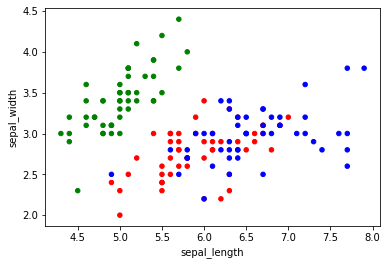

In [5]:
#lets visualize the class with respect to two features
df2 = df.copy()
df2 ["color"] = df2.species.replace(["versicolor", "virginica", "setosa"], ["red", "blue", "green"])
df2.plot.scatter("sepal_length", "sepal_width", c=df2["color"])

## Prepare the data for scikit-learn

scikit learn is not based on pandas dataframes, but on numpy arrays. numpy is the package that underlies also pandas, and we can get these arrays easily from a pandas frame.

In [6]:
type(df.values)

numpy.ndarray

In [7]:
val = df.values
print (type(val))
print (val)

<class 'numpy.ndarray'>
[[5.1 3.5 1.4 0.2 'setosa']
 [4.9 3.0 1.4 0.2 'setosa']
 [4.7 3.2 1.3 0.2 'setosa']
 [4.6 3.1 1.5 0.2 'setosa']
 [5.0 3.6 1.4 0.2 'setosa']
 [5.4 3.9 1.7 0.4 'setosa']
 [4.6 3.4 1.4 0.3 'setosa']
 [5.0 3.4 1.5 0.2 'setosa']
 [4.4 2.9 1.4 0.2 'setosa']
 [4.9 3.1 1.5 0.1 'setosa']
 [5.4 3.7 1.5 0.2 'setosa']
 [4.8 3.4 1.6 0.2 'setosa']
 [4.8 3.0 1.4 0.1 'setosa']
 [4.3 3.0 1.1 0.1 'setosa']
 [5.8 4.0 1.2 0.2 'setosa']
 [5.7 4.4 1.5 0.4 'setosa']
 [5.4 3.9 1.3 0.4 'setosa']
 [5.1 3.5 1.4 0.3 'setosa']
 [5.7 3.8 1.7 0.3 'setosa']
 [5.1 3.8 1.5 0.3 'setosa']
 [5.4 3.4 1.7 0.2 'setosa']
 [5.1 3.7 1.5 0.4 'setosa']
 [4.6 3.6 1.0 0.2 'setosa']
 [5.1 3.3 1.7 0.5 'setosa']
 [4.8 3.4 1.9 0.2 'setosa']
 [5.0 3.0 1.6 0.2 'setosa']
 [5.0 3.4 1.6 0.4 'setosa']
 [5.2 3.5 1.5 0.2 'setosa']
 [5.2 3.4 1.4 0.2 'setosa']
 [4.7 3.2 1.6 0.2 'setosa']
 [4.8 3.1 1.6 0.2 'setosa']
 [5.4 3.4 1.5 0.4 'setosa']
 [5.2 4.1 1.5 0.1 'setosa']
 [5.5 4.2 1.4 0.2 'setosa']
 [4.9 3.1 1.5 0.1 'setos

In order to make a classification, we need separate arrays for the describing features, and the class label:

In [8]:
labels = df['species'].values
labels

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

Classifiers in scikit expect the classes to be integers, so we need to transform the strings into integers. Fortunately, there are convenience functions available to do this.

In [9]:
from sklearn import preprocessing
labels = preprocessing.LabelEncoder().fit_transform(labels)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
features = df.drop("species", axis=1).values
features

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## Learning and predicting with a classifier

In [11]:
#from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit (features, labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [12]:
predicted = clf.predict(features)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Training set accuracy

In [13]:
# which instances have been predicted correctly
labels == predicted

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,

In [14]:
# how many?
sum((labels==predicted).astype(int)

SyntaxError: unexpected EOF while parsing (<ipython-input-14-05590e40f23d>, line 2)

In [15]:
sum(labels==predicted) / len (labels)

0.9666666666666667

## Training and test

In [16]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.33, random_state=42)

In [17]:
print (len (features_train))
print (len (features_test))
print (len (labels_train))
print (len (labels_test))

100
50
100
50


In [18]:
# We fit the classifier on the training data:
clf = KNeighborsClassifier()
clf.fit (features_train, labels_train)

#and use it to predict the test data
predicted_test = clf.predict (features_test)
predicted_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [19]:
# print the accuracy on the test set:
sum(labels_test==predicted_test) / len (labels_test)

0.98

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(labels_test, predicted_test)

0.98

In [21]:
# equivalently for other evaluation measures:
from sklearn.metrics import precision_recall_fscore_support
precision, recall, fscore, support = precision_recall_fscore_support(labels_test, predicted_test, labels=[1])
print ("Precision: ", precision) # if label 1 is predicted, how often is it really label 1
print ("Recall: ", recall) # How likely is the prediction of an instance with label 1 really label 1
print ("F_score: ", fscore) # harmonic mean of precision and recall
print ("support: ", support) # how often does this label occur

Precision:  [0.9375]
Recall:  [1.]
F_score:  [0.96774194]
support:  [15]


## K-fold cross validation

In [22]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, random_state=None, shuffle=True)
for train_index, test_index in kf.split(features):
    #print (test_index)
    features_train = features[train_index]
    labels_train = labels[train_index]
    features_test = features [test_index]
    labels_test = labels [test_index]
    
    clf.fit (features_train, labels_train)
    predicted_test = clf.predict (features_test)
    print (sum(labels_test==predicted_test) / len (labels_test))

0.9333333333333333
0.9333333333333333
0.9333333333333333
1.0
1.0
1.0
1.0
1.0
1.0
0.8


In [23]:
# we can do this also much shorter
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, features, labels, cv=10, scoring="accuracy")
print (scores)
print ("Accuracy according to cross-validation: ", scores.mean())

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
Accuracy according to cross-validation:  0.9666666666666668


## A less trivial example

In [24]:
#read the dataset
df = pd.read_csv ("data/adult.csv", na_values="?")
df.dropna(inplace=True)

In [25]:
#Lets look at the data again
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37.0,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


We want to predict the class attribute, i.e., has a person a high income

In [26]:
df['class'].value_counts(normalize=True)

<=50K    0.752151
>50K     0.247849
Name: class, dtype: float64

In [27]:
y = df ['class'].values
y = preprocessing.LabelEncoder().fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 1])

In [28]:
# for the features, we start with removing the class 
df_features = df.drop("class", axis=1)
df_features.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
5,37.0,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States


We need to split categorical variables into binaries in order to not imply an order that is not justified by the data

In [29]:
pd.get_dummies (df.occupation)

,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,0,0,0,0
10,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [30]:
df_features = pd.get_dummies(df_features)
df_features.head()



,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
1,50.0,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38.0,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53.0,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28.0,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,37.0,284582,14,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [31]:
X = df_features.values
X

array([[5.00000e+01, 8.33110e+04, 1.30000e+01, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [3.80000e+01, 2.15646e+05, 9.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [5.30000e+01, 2.34721e+05, 7.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [3.80000e+01, 3.74983e+05, 1.30000e+01, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [4.40000e+01, 8.38910e+04, 1.30000e+01, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [3.50000e+01, 1.82148e+05, 1.30000e+01, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
clf = KNeighborsClassifier()
scores = cross_val_score(clf, X, y, cv=10, scoring="accuracy")
scores

array([0.77139067, 0.76873756, 0.77315941, 0.76957099, 0.76603273,
       0.77134011, 0.77797435, 0.76315789, 0.76885645, 0.76575979])

In [33]:
print ("mean (scores)", scores.mean())

mean (scores) 0.7695979948826713


This looks good!

In [34]:
df["class"].value_counts() / len(df)

<=50K    0.752151
>50K     0.247849
Name: class, dtype: float64

Maybe it looks not as good as we thought...
lets try other classifiers!

In [35]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [36]:
clf_names = ["k-Nearest Neighbors", 
             #"Linear SVM", 
             #"RBF SVM",
             "Decision Tree", 
             "Random Forest", 
             "Neural Net", 
             "Naive Bayes",
             "AdaBoost",
            "Logistic Regression"]
clfs = [KNeighborsClassifier(n_neighbors=10),
    #SVC(kernel="linear"),
    #SVC(gamma=2, C=1),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    GaussianNB(),
    AdaBoostClassifier(),
    LogisticRegression()]
 

In [ ]:
for name, clf in zip(clf_names, clfs):
    print (name)
    %time scores = cross_val_score(clf, X, y, cv=10, scoring="accuracy")
    print ("Accuracy according to cross-validation: ", scores.mean(), "\n")

k-Nearest Neighbors
Wall time: 12.3 s
Accuracy according to cross-validation:  0.7899646641084256 

Decision Tree


KeyboardInterrupt: 

Accuracy according to cross-validation:  0.7899646641084256 

Random Forest


C:\Users\Florian\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Florian\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Florian\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Florian\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Florian\Anaconda3\lib\site-packages\sklearn\ensemble\forest

Wall time: 8.61 s
Accuracy according to cross-validation:  0.842860821415697 

Neural Net


C:\Users\Florian\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\Florian\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\Florian\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\Florian\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


## Beyond binary predictions:

In [ ]:
clf = RandomForestClassifier()
features_train, features_test, labels_train, labels_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf.fit(features_train, labels_train)

In [ ]:
clf.predict_proba(features_test)

## Feature Importance

In [ ]:
fi = clf.feature_importances_
fi

In [ ]:
features = list(df_features.columns)

In [ ]:
feature_importances_df = pd.DataFrame ({"Feature" : features, "importance": fi})
feature_importances_df.sort_values("importance", ascending=False)



## Grid Search

In [ ]:
knn_1 = KNeighborsClassifier(n_neighbors = 1)
scores = cross_val_score(knn_1, X, y, cv=5, scoring="accuracy")
print ("Accuracy according to: knn_1", scores.mean(), "\n")

knn_5 = KNeighborsClassifier(n_neighbors = 5)
scores = cross_val_score(knn_5, X, y, cv=5, scoring="accuracy")
print ("Accuracy according to: knn_5", scores.mean(), "\n")

knn_50 = KNeighborsClassifier(n_neighbors = 50)
scores = cross_val_score(knn_50, X, y, cv=5, scoring="accuracy")
print ("Accuracy according to: knn_50", scores.mean(), "\n")

knn_500 = KNeighborsClassifier(n_neighbors = 500)
scores = cross_val_score(knn_500, X, y, cv=5, scoring="accuracy")
print ("Accuracy according to: knn_500", scores.mean(), "\n")


In [ ]:
knn_5w = KNeighborsClassifier(n_neighbors = 5, weights="distance")
%time scores = cross_val_score(knn_5w, X, y, cv=5, scoring="accuracy")
print ("Accuracy according to: knn_5", scores.mean(), "\n")

knn_50w = KNeighborsClassifier(n_neighbors = 50, weights="distance")
%time scores = cross_val_score(knn_50w, X, y, cv=5, scoring="accuracy")
print ("Accuracy according to: knn_50w", scores.mean(), "\n")

#...

In [ ]:
## Sample, such that it does not take too long in the presentation:
df_sample = df.sample(2000, random_state=42)
y_sample  = df_sample ['class'].values
df_sample_features = df_sample.drop("class", axis=1)
df_sample_features = pd.get_dummies(df_sample_features)
X_sample = df_sample_features.values

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {"n_neighbors": [1,5,50,500], "weights" : ["uniform", "distance"]}
clf = GridSearchCV (KNeighborsClassifier(), params, cv=5, scoring="accuracy")
clf.fit (X_sample,y_sample)

In [ ]:
clf.cv_results_

In [ ]:
clf.best_score_

In [ ]:
clf.best_params_

## We did not talk about
... a lot of things naturally. The most important next steps would cover: Handling missing values, feature scaling, AutoML